---
---
# Previsão do Nível de Satisfação dos Clientes do Santander

### _Santander Customer Satisfaction_
---
---

##  Pré-processamento de Dados // _Data Pre-processing_

In [1]:
# Versão da Linguagem Python // Python language version
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Installs pyarrow
#!pip install pyarrow

In [3]:
# Imports
import scipy
from scipy import stats

# Imports
import joblib
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import imblearn
from imblearn.over_sampling import SMOTENC
import warnings
warnings.filterwarnings("ignore")

from utils import *

In [4]:
# Versões dos pacotes usados neste jupyter notebook // Versions of packages used in this jupyter notebook
#!pip install -q -U watermark
%reload_ext watermark
%watermark -a "Tatiana Novaes Carvalho" --iversions

Author: Tatiana Novaes Carvalho

numpy     : 1.22.3
sklearn   : 1.1.2
imblearn  : 0.0
joblib    : 1.1.0
matplotlib: 3.5.1
scipy     : 1.7.3
pandas    : 1.4.2
seaborn   : 0.11.2



### DATASET DE TREINO | _TRAINING DATA SET_

### Carga dos dados // _Data load_

In [5]:
# Carrega os dados // Load the data
df_train = pd.read_csv('../datasets/df_train_eng.csv',  index_col = 0)

In [6]:
df_train.shape

(47985, 140)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47985 entries, 56183 to 1703
Columns: 140 entries, var15 to TARGET
dtypes: float64(69), int64(71)
memory usage: 51.6 MB


In [8]:
df_train.head()

,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var39_efect_ult1,...,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
56183,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
43354,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,407115.540000,0
31400,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85564.710000,0
123436,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
109140,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72880.980000,0


In [9]:
df_train.isnull().any().sum()

0

### Separação das Variáveis // _Separation of Variables_

In [10]:
# Identificação das variáveis  // Variables identification

# Definição da variável-alvo // Target definition
target = 'TARGET'

# Separação das variáveis categóricas e numéricas // Separation of categorial and numerical features
cat_features, num_features = identify_variables_type(df_train, target)

print(f'Quantidade de variáveis categóricas: {len(cat_features)}')
print(f'Quantidade de variáveis numéricas: {len(num_features)}')

Quantidade de variáveis categóricas: 71
Quantidade de variáveis numéricas: 68


In [11]:
# Conversão dos tipos de dados das variáveis // Conversion of variables data types

df = convert_variables_dtype(df_train, cat_features, num_features, target)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47985 entries, 56183 to 1703
Columns: 140 entries, var15 to TARGET
dtypes: category(72), float64(68)
memory usage: 28.6 MB


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47985 entries, 56183 to 1703
Columns: 140 entries, var15 to TARGET
dtypes: category(72), float64(68)
memory usage: 28.6 MB


### Pré-processamento dos dados // _Data pre-processing_

> Balanceamento de dados // _Data balancing_

Classes desbalanceadas:
Satisfied Customer: 46082 - 96.0%
Insatisfied Customer: 1903 - 4.0%


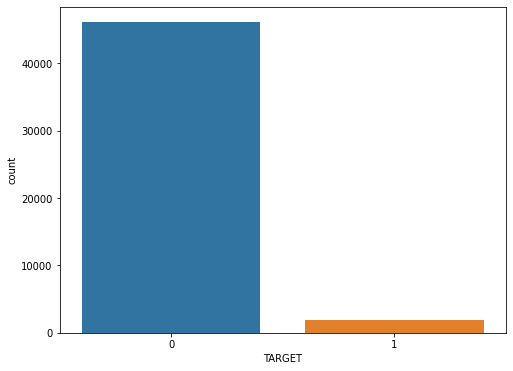

In [13]:
# Variável target // Target Variable #https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/
# apenas nos dados de treino

# Plot
plt.figure(figsize = (8, 6))
sns.countplot(data = df_train, x = target, label = 'Count')

# Value counts
df_train[target].value_counts()           
no, yes = df_train[target].value_counts() 

# Percentuais
no_perc, yes_perc = round(df_train[target].value_counts()/len(df_train) * 100) 

# Print
print('Classes desbalanceadas:')
print(f'Satisfied Customer: {no} - {no_perc}%')
print(f'Insatisfied Customer: {yes} - {yes_perc}%')

**Observação:** Se forem oferecidos muito mais exemplos de uma das classes ao algoritmo de machine learning, o modelo aprenderá muito mais sobre uma classe do que sobre a outra, o que geraria viés no aprendizado. Assim, torna-se necessário fazer o balanceamento da variável target, por meio da criação de dados sintéticos com o mesmo padrão para a classe minoritária. Como essa transformação é realizada para que não ocorra erro no aprendizado, e considerando que os dados de teste visam avaliar o modelo treinado, o balanceamento deve ser aplicado somente aos dados de treino.

---

**_Observation:_** _If the machine learning algorithm is given many more examples of one of the classes, the model will learn much more about one class than the other, which would lead to learning bias. Thus, it becomes necessary to balance the target variable, by creating synthetic data with the same pattern for the minority class. As this transformation is performed so that there is no error in learning, and considering that the test data aim to evaluate the trained model, the balancing must be applied only to the training data._

In [14]:
# Apuração dos índices das variáveis categóricas para uso como argumento na função SMOTENC
# Calculation of the indices of the categorical variables to be used as an argument in the SMOTENC function
    
idx_cat = [idx for idx, col in enumerate(df_train.columns) if col in cat_features]
print(idx_cat)
print(len(idx_cat))

[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 69, 70, 71, 72, 73, 74, 75, 87, 100, 101, 102, 103, 104, 105, 107, 110, 111, 112, 113, 114]
71


In [15]:
# Aplicação da técnica de oversampling para aumentar o número de exemplos da classe minoritária
# Application of the oversampling technique to increase the number of minority class examples

# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC

over_sampler = SMOTENC(categorical_features = idx_cat, k_neighbors = 2, random_state=99)

X_train = df_train.drop(target, axis = 1)
y_train = df_train[target]

# Aplica o oversampling (somente com dados de treino)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

print(len(X_res))
print(len(y_res))
print(y_res.value_counts())

# Ajusta o nome do dataset de treino para X
X_train = X_res

# Ajusta o nome do dataset de treino para y
y_train = y_res

display(X_train.head())
display(y_train.head())

92164
92164
0    46082
1    46082
Name: TARGET, dtype: int64


,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var39_efect_ult1,...,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,var38
0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,407115.540000
2,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85564.710000
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
4,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72880.980000


0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: category
Categories (2, int64): [0, 1]

In [16]:
y_train.value_counts()

0    46082
1    46082
Name: TARGET, dtype: int64

In [17]:
df_train = X_train.copy()
df_train[target] = y_train
df_train.head()


,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var39_efect_ult1,...,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,var38,TARGET
0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
1,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,407115.540000,0
2,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85564.710000,0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
4,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72880.980000,0


> Padronização

In [18]:
df_train.describe()

,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var39_efect_ult1,...,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,var38
count,92164.000000,92164.000000,92164.000000,92164.000000,92164.000000,92164.000000,92164.000000,92164.000000,92164.000000,92164.000000,...,92164.000000,92164.000000,92164.000000,92164.000000,92164.000000,92164.000000,92164.000000,92164.000000,92164.000000,9.216400e+04
mean,36.473678,84.325950,76.407065,119.349767,3.311402,5.131950,1.252024,1.722113,3.811408,105.658615,...,288.094052,404.722571,84.631579,3.724942,0.704637,6.120296,20.155947,1.029615,43.794223,1.071694e+05
std,12.170113,1509.990542,366.830100,523.655891,76.660202,111.127667,31.143199,46.906445,82.490978,583.320387,...,5149.367172,9290.864509,3439.259281,297.923679,86.000948,481.341615,1778.984408,114.442429,3250.530556,1.482648e+05
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.017600e+04
50%,34.748983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.089272e+04
75%,43.456825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.173110e+05
max,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,1800.000000,3810.000000,8237.820000,45990.000000,...,290322.570000,568965.480000,534000.000000,50003.880000,20385.720000,63317.190000,438329.220000,24650.010000,681462.900000,2.203474e+07


In [19]:
# Padronização das variáveis // Standardization of the variables

col_std = [col for col in df_train.columns if col != target]

scaler = StandardScaler()
df_train.loc[:,col_std] = scaler.fit_transform(df_train.loc[:,col_std])
df_train.head()

,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var39_efect_ult1,...,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,var38,TARGET
0,-1.024949,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,-0.046204,-0.181134,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,0.068402,0
1,-0.860611,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,-0.046204,-0.181134,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,2.023054,0
2,0.536261,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,-0.046204,-0.181134,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,-0.145718,0
3,-0.860611,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,-0.046204,-0.181134,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,0.068402,0
4,-1.107118,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,-0.046204,-0.181134,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,-0.231266,0


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,TARGET
0,-0.962970,-0.139901,0.512035,0.289582,-1.742029,0.008159,1.418901,0.850655,0.080787,-0.387329,...,0.001433,-0.020950,0.110633,-0.090438,-0.013364,0.041257,-0.083955,0.052262,0.104241,0
1,-2.047610,-0.895921,-0.621810,-0.174089,1.622832,-0.187236,0.684489,-1.692422,0.077420,0.058984,...,0.077008,-0.033159,-0.101408,-0.032301,0.155387,-0.002239,-0.218455,-0.133883,0.108512,0
2,-1.993144,-0.846271,-0.645673,-0.182129,1.713890,-0.165053,0.594628,-1.861256,0.044441,0.110131,...,0.092877,-0.017468,-0.083644,-0.033971,0.011567,-0.100656,-0.015338,-0.066765,0.199870,0
3,-0.885292,-0.045042,0.593801,0.285341,-2.107147,0.039614,1.522453,1.171401,0.064882,-0.472482,...,0.026180,0.040454,0.177138,0.006560,0.059984,0.055181,-0.116211,0.072003,0.033047,0
4,-2.750362,-1.202721,-1.143087,-0.427217,3.189825,0.177082,-3.654614,2.215011,-0.234647,0.232427,...,-0.224387,-0.338339,-0.064667,0.029993,0.162110,-0.011921,-0.055340,-0.050330,0.235717,0


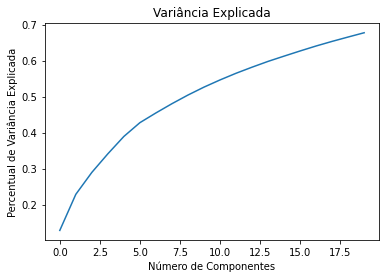

In [20]:
# Aplicação de PCA para apuração da variância explicada // Application of PCA to determine explained variance

cols_pca = ['PCA'+str(i) for i in range(1,21)]

pca = PCA(n_components = 20)
train_pca = pca.fit_transform(df_train.drop(target, axis=1))

df_train_pca = pd.DataFrame(train_pca, columns = cols_pca)
df_train2 = df_train_pca.merge(df_train[[target]], left_index = True, right_index = True)


display(df_train2.head())

# Soma cumulativa da variância explicada // Cumulative sum of explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada')
plt.show()

**Observação:** Considerando que 2 componentes gerados pelo algoritmo PCA foram capazes de explicar cerca de 25% da variância dos dados, esses componentes serão acrescentados ao dataset para o treinamento dos modelos.

---

**_Observation:_** _Considering that 2 components generated by the PCA algorithm were able to explain about 25% of the data variance,these components will be added to the dataset to train the models._


In [21]:
# Aplicação de PCA // Application of PCA

cols_pca = ['PCA'+str(i) for i in range(1,3)]

pca = PCA(n_components = 2)
train_pca = pca.fit_transform(df_train.drop(target, axis=1))

df_train_pca = pd.DataFrame(train_pca, columns = cols_pca)
df_train2 = df_train_pca.merge(df_train, left_index = True, right_index = True)

display(df_train2.head())

,PCA1,PCA2,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,var38,TARGET
0,-0.962970,-0.139903,-1.024949,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,0.068402,0
1,-2.047607,-0.895903,-0.860611,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,2.023054,0
2,-1.993145,-0.846273,0.536261,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,-0.145718,0
3,-0.885292,-0.045037,-0.860611,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,0.068402,0
4,-2.750361,-1.202725,-1.107118,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,-0.231266,0


In [22]:
# Gravação do df em disco // Write df to disk

df_train2.to_csv('../datasets/df_train_preprocess.csv', sep = ',', encoding = 'utf-8')


In [23]:
df_train2[target].value_counts()

0    46082
1    46082
Name: TARGET, dtype: int64

### DATASET DE TESTE | _TEST DATA SET_

In [24]:
# Carrega os dados // Load the data
df_test = pd.read_csv('../datasets/df_test_eng.csv', index_col = 0)

print(df_test.shape)
display(df_test.head())

(25087, 140)


,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var39_efect_ult1,...,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
101019,45.0,0.0,709.05,1399.17,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77930.250000,0
10518,60.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165125.040000,0
43966,27.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82636.440000,0
85554,38.0,0.0,269.40,754.05,0.0,0.0,0.0,0.0,0.0,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67460.550000,0
37070,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [25]:
# Padronização das variáveis // Standardization of the variables

col_std = [col for col in df_test.columns if col != target]

df_test.loc[:,col_std] = scaler.transform(df_test.loc[:,col_std])

df_test.head()

,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var39_efect_ult1,...,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
101019,0.700599,-0.055846,1.724630,2.444023,-0.043196,-0.046181,-0.040202,-0.036714,-0.046204,-0.181134,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,-0.197210,0
10518,1.933133,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,-0.046204,-0.181134,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,0.390894,0
43966,-0.778442,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,-0.046204,-0.181134,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,-0.165468,0
85554,0.125416,-0.055846,0.526113,1.212063,-0.043196,-0.046181,-0.040202,-0.036714,-0.046204,0.436026,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,-0.267826,0
37070,-1.107118,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,-0.046204,-0.181134,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,0.068402,0


In [26]:
# Aplicação de PCA // PCA aplication

test_pca = pca.transform(df_test.drop(target, axis=1))

df_test_pca = pd.DataFrame(test_pca, columns = cols_pca)
df_test2 = df_test_pca.merge(df_test, left_index = True, right_index = True)
df_test2.head()


,PCA1,PCA2,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,var38,TARGET
10,4.004402,-1.080939,0.207585,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,0.068402,0
14,2.504976,15.271996,-0.778442,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,-0.082372,0
18,-0.476002,-0.221313,-0.860611,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,0.974407,0
29,-0.925017,-0.140909,1.193613,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,0.101512,0
80,-2.740984,-1.178466,-0.860611,-0.055846,-0.208291,-0.227918,-0.043196,-0.046181,-0.040202,-0.036714,...,-0.043562,-0.024608,-0.012503,-0.008193,-0.012715,-0.01133,-0.008997,-0.013473,0.107538,0


In [27]:
df_test2[target].value_counts()

0    3929
1     166
Name: TARGET, dtype: int64

In [28]:
# Gravação do df em disco // Write df to disk

df_test2.to_csv('../datasets/df_test_preprocess.csv', sep = ',', encoding = 'utf-8')

In [29]:
# Gravaçào do scaler e do pca

with open(f'../models/scaler.pkl', 'wb') as pickle_file:
    joblib.dump(scaler, pickle_file)

with open(f'../models/pca.pkl', 'wb') as pickle_file:
    joblib.dump(pca, pickle_file)